# Different linkage, different hierarchical clustering!

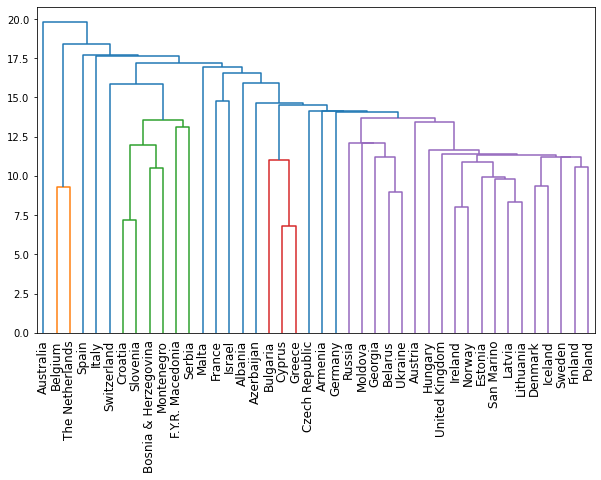

In [17]:
# Perform the necessary imports
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram

df = pd.read_csv('../data/eurovision 2016 voting/eurovision-2016-televoting.csv')
df = df.fillna(12) # assume that countries would vote highest number for themselves
samples = df.iloc[:,1:].values
# samples = normalize(df.iloc[:,1:].values)
country_names = df.iloc[:,0].values

# Calculate the linkage: mergings
mergings = linkage(samples, method = 'single')

# Plot the dendrogram
dendrogram(mergings,
    labels = country_names,
    leaf_rotation = 90,
    leaf_font_size = 12
)
plt.gcf().set_size_inches(10,6)
plt.show()

# Extracting cluster labels using fcluster

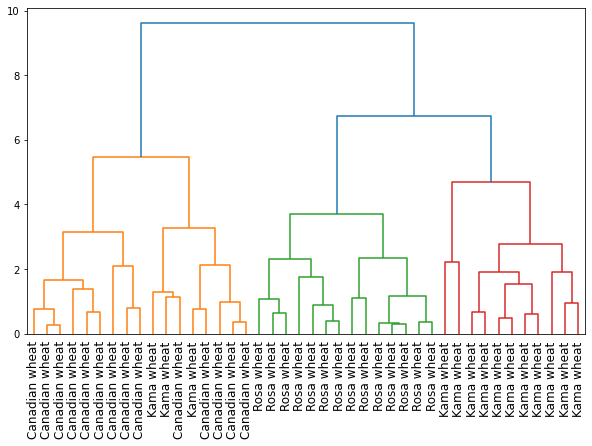

In [22]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

seeds_df = pd.read_csv('../data/Seeds Dataset/seeds-less-rows.csv')

# remove the grain species from the DataFrame, save for later
varieties = list(seeds_df.pop('grain_variety'))

# extract the measurements as a NumPy array
samples = seeds_df.values

mergings = linkage(samples, method='complete')

dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=12,
)
plt.gcf().set_size_inches(10,6)
plt.show()

In [23]:
from scipy.cluster.hierarchy import fcluster

labels = fcluster(mergings, 6, criterion='distance')
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
1,14,3,0
2,0,0,14
3,0,11,0


# t-SNE visualization of grain dataset

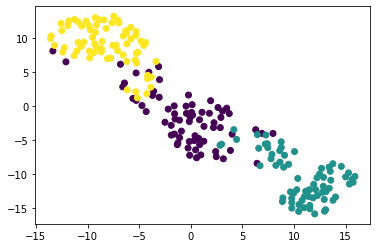

In [35]:
# Import TSNE
from sklearn.manifold import TSNE
import numpy as np

samples = np.loadtxt('../data/Seeds Dataset/seeds_dataset.txt', delimiter = "\t")

variety_numbers = samples[:,-1]

# Create a TSNE instance: model
model = TSNE(learning_rate = 200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples[:,:-1])

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys, c = variety_numbers)
plt.show()


# A t-SNE map of the stock market ( individual samples can be labeled)

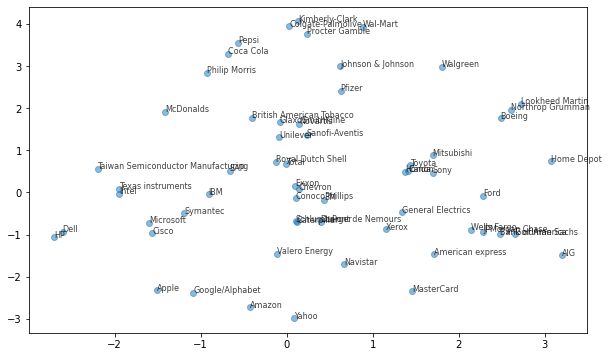

In [12]:
import pandas as pd
from sklearn.preprocessing import Normalizer
# Import TSNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

df = pd.read_csv('../data/daily stock price movements/company-stock-movements-2010-2015-incl.csv')

movements = df.iloc[:,1:].values
companies = df.iloc[:,0].values

# Create a normalizer: normalizer
normalizer = Normalizer()

normalized_movements = normalizer.fit_transform(movements)

# Create a TSNE instance: model
model = TSNE(learning_rate = 50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys, alpha = 0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=8, alpha=0.75)

plt.gcf().set_size_inches(10,6)
